In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as ra
import matplotlib.pyplot as plt

# <center> Motivation </center>

An infinite set of matrices with the same eigenvalues can be produced, starting from the solution of a single eigenvalue problem. That is, lets start with a matrix $\mathbf{A}$. The eigenvalue problem consists of finding an eigenvalue $\lambda$ and a set of eigenvectors $v \in V(\mathbf{A})$ such that
\begin{equation}
(\forall v \in V(\mathbf{A})): (\mathbf{A} - \lambda \mathbb{1}) v = 0
\end{equation}
We can construct a new matrix $\mathbf{\tilde{A}}$ with the same eigenvalues by defining its set of eigenvectors $\tilde{v} \in V(\mathbf{\tilde{A}})$ to be related to $v \in V(\mathbf{A})$ by
\begin{equation}
(\exists v \in V(\mathbf{A}, \forall \tilde{v} \in V(\mathbf{\tilde{A}})): v = \mathbf{Q} \tilde{v}
\end{equation}
for some invertible matrix $\mathbf{Q}$. To show this, we begin with a true statement and slowly massage it into another eigenvalue problem with the same eigenvalue $\lambda$.
\begin{equation}
(\mathbf{A} - \lambda \mathbb{1}) v = 0 \to (\mathbf{A} - \lambda) \mathbb{1}) \mathbf{Q} \tilde{v} = 0 \to (\mathbf{A} \mathbf{Q} - \lambda \mathbf{Q} ) \tilde{v} = 0
\end{equation}
We note that the above equation, via associativity, reduces to a related eigenvalue problem when we multiply it by $\mathbf{Q}^{-1}$,
\begin{equation}
(\mathbf{Q}^{-1} \mathbf{A} \mathbf{Q} - \lambda \mathbb{1} ) \tilde{v} = 0.
\end{equation}
And so, by inspection, we have identified a related matrix $\mathbf{\tilde{A}} = \mathbf{Q}^{-1} \mathbf{A} \mathbf{Q}$ with the same eigenvalues as $\mathbf{A}$, but with a different set of eigenvectors.

This transformation is called a **similarity transformation**. Wouldn't it be nice if we are able to find a similarity transformation such that $\mathbf{\tilde{A}}$ is an upper triangular matrix? This is called the Schur form of $\mathbf{A}$, given a special name since one can now read off the eigenvalues of $\mathbf{A}$ with $\mathbf{\tilde{A}}$ - it's just the diagonal elements!
___

Similarity transformations are dime a dozen. We might want to restrict the set of matrices $\mathbf{Q}$, which we use to define the transformation - thinking about considerations of stability.

One good idea you can have is that the similarity transformation should somehow preserve the size of the eigenvectors. We know of one such set - orthogonal matrices. These matrices are defined by the fact that their transposes are also their own inverse.
\begin{equation}
\mathbf{Q}^T \mathbf{Q} = \mathbf{Q}^{-1} \mathbf{Q} = \mathbb{1}
\end{equation}
It is easy to show their size-preserving property. Consider
\begin{equation}
\tilde{v} = Q^{-1} v
\end{equation}
Then the norm of $\tilde{v}$ is equal to the norm of $v$, as shown here:
\begin{equation}
\tilde{v}^T \tilde{v} = \left( Q^{-1} v \right)^T Q^{-1} v = \left( Q^T v \right)^T Q^T v = \left( v^T Q \right) Q^T v = v^T \left( Q^T Q \right) v = v^T v
\end{equation}
This is a usful similarity transformation, since if we wish to go through a set of similarity transformations (and we will), the size of the matrices involved will, in some sense, remain constant.

## <center> Gram-Schmidt orthonormalization </center>

There is an easy way to construct an $N \times N$ orthogonal matrix. If we have a set of $N$ orthonomal $N$-vectors, $\{u_i\}$, defined by
\begin{equation}
u^T_i u_k = \delta_{i,k},
\end{equation}
then an orthogonal matrix can be constructed by using the set $\{u_i\}$ as either the column vectors of the matrix,
\begin{equation}
Q = [u_1, u_2, \dots, u_{N-1}, u_N]
\end{equation}
or the row vectors of the matrix
\begin{equation}
Q = [u_1, u_2, \dots, u_{N-1}, u_N]^T
\end{equation}
___

This begs the question: how do we generate set of $N$ orthonormal $N$-vectors? Before answering this, how can we generate a vector $v$ that is orthogonal to another set of orthogonal vectors $\{w_i\}$. One idea is to sequentially remove the components of $v$ that is parallel to each of the vectors.
That is, we can calculate $v_{i,\parallel}$,
\begin{equation}
\dfrac{v\cdot w_i}{|w_i|} \hat{w_i} = v_{i,\parallel} \to \dfrac{v\cdot w_i}{w_i \cdot w_i} w_i = v_{i,\parallel},
\end{equation}
and then remove this from $v$,
\begin{equation}
u = v - \sum_{i} v_{i,\parallel} = v - \sum_{i} \dfrac{v\cdot w_i}{w_i \cdot w_i} w_i
\end{equation}
We are assured that
\begin{equation}
w_i \cdot u = 0,
\end{equation}
since
\begin{equation}
w_i \cdot w_k = \delta_{i,k}
\end{equation}

In the following, define a function $\texttt{getorthogonal}$ which takes in as first input a vector $v$ and as second input a set of orthogonal $\{w_i\}$, and outputs $u$ which is orthogonal to each of the vectors in $\{w_i\}$.

A useful function here is $\texttt{np.copy}$, which copies a matrix to another variable so that mutations on the copied matrix does not affect the original matrix.

In [2]:
def getorthogonal(v, w_set):

    u = v
    for w in w_set:
        u -= (np.dot(v,w)/np.dot(w,w))*w
        
    return u

In the following unit test, w_set is a set of orthogonal vectors.

In [3]:
N = 10
N_w = 5
N_test = 50
w_set = [np.array([1,2,0,0,0,0,0,0,0,0]),np.array([0,0,5,3,0,0,0,0,0,0]),np.array([0,0,0,0,2,9,0,0,0,0]), \
        np.array([0,0,0,0,0,0,3,9,0,0]), np.array([0,0,0,0,0,0,0,0,3,1])]
error = 1E-6

for _ in range(N_test):
    v = ra.rand(N)
    u = getorthogonal(v,w_set)
    for w in w_set:
        assert np.dot(u,w) < error

It would be useful if $\texttt{getorthogonal}$ can work with an empty set

In [4]:
v = ra.rand(N)
u = getorthogonal(v,[])
assert (np.dot(u,v) - np.dot(v,v)) < error

In the following, define a function $\texttt{normalize}$ whose input is a set of vectors $\{w_i\}$ and whose outputs are vectors $\{u_i\}$ with unit length,
\begin{equation}
u_i \cdot u_i = 1
\end{equation}

In [5]:
def normalize(w_set):

    u_set = []
    for w in w_set:
        u_set.append(w/np.sqrt(np.dot(w,w)))
    return u_set

We modify the previous unit test, using an orthogonal set $\texttt{wset}$ and test whether the output of normalize is an orthonormal set.

In [6]:
w_set = [np.array([1,2,0,0,0,0,0,0,0,0]),np.array([0,0,5,3,0,0,0,0,0,0]),np.array([0,0,0,0,2,9,0,0,0,0]), \
        np.array([0,0,0,0,0,0,3,9,0,0]), np.array([0,0,0,0,0,0,0,0,3,1])]
error = 1E-6

u_set = normalize(w_set)
for ui in u_set:
    for uk in u_set:
        assert abs(np.dot(ui,uk)) < error or abs(1 - np.dot(ui,uk)) < error

We are now ready to do the Gram-Schmidt process. The idea is that if we are given a set of linearly independent vectors $\{v_i\}$, we may sequentially produce a set of orthogonal vectors using $\texttt{getorthogonal}$.

That is, we start by selecting one vector $v_1$, and adding that vector into $\{w_i\}$. Then select another vector v_2, use $\texttt{getorthogonal}$ before adding the result to $\{w_i\}$. This goes on until we select the last vector in $\{v_i\}$. Then we use $\texttt{normalize}$ to generate an orthonormal set of vectors.

Implement this idea in $\texttt{orthonormalize}$, whose input is a set of linearly independent vectors $\{v_i\}$, whose partial output is an orthogonal set of vectors $\{w_i\}$ and whose final output is an orthonormal set of vectors $\{u_i\}$.

In [7]:
def orthonormalize(v_set):    
    
    w_set = [v_set[0]]
    N = len(v_set)
    for i in range(1,N) :
        w_set.append(getorthogonal(v_set[1],w_set))
    u_set = normalize(w_set)
    return u_set


In the following, we produce a random set of linearly independent vectors, and then test if the output of $\texttt{orthonormalize}$ is an orthonormal set of vectors

In [8]:
N = 10
error = 1E-6
v_set = []
for _ in range(N):
    v_set.append(ra.rand(N))

u_set = orthonormalize(v_set)
for ui in u_set:
    for uk in u_set:
        assert np.dot(ui,uk) < error or abs(1 - np.dot(ui,uk)) < error

C:\Users\dj1ga\AppData\Local\Temp\ipykernel_13848\2621877471.py:5: RuntimeWarning: invalid value encountered in double_scalars
  u -= (np.dot(v,w)/np.dot(w,w))*w


AssertionError: 

## <center> Calculating $\mathbf{Q}$ </center>

The technical details of the QR algorithm is beyond our reach. However, one can grasp general ideas from what we already know. The following equation
\begin{equation}
\tilde{A} = Q^T \tilde{A} Q
\end{equation}
can be understood as a relaxation problem, since it is of the form
\begin{equation}
x = f(x), \qquad x^{(n+1)} = \alpha f(x^{(n)}) - (1-\alpha) x^{(n)}
\end{equation}
Thus, a sequence can be created of approximation of $\mathbf{\tilde{A}}$ via the following recursion,
\begin{equation}
\tilde{A}^{(n+1)} = \alpha \left( Q^T \tilde{A}^{(n)} Q \right) - (1-\alpha) \tilde{A}^{(n)}
\end{equation}
In the language of Chapter 6 of Newmann, the QR algorithm can be understood as simply an overrelaxed root finding problem, choosing $\alpha = 1$.
\begin{equation}
\tilde{A}^{(n+1)} = Q^T \tilde{A}^{(n)} Q
\end{equation}
There's a lot of choices for $Q$, but we want to select $Q$ such that the solution $\tilde{A}$ to 
\begin{equation}
\tilde{A} = Q^T \tilde{A} Q
\end{equation}
is an upper triangular matrix - aka, the Schur form of our seed matrix $\tilde{A}^{(0)} = A$. Apparently, one such choice is to construct $Q$ from the set of orthonormal vectors that arise by applying the Gram-Schmidt process on the column vectors of $\tilde{A}$.

In the language of the relaxation process, we may think of $Q$ as a function on $\tilde{A}$, such that
\begin{equation}
\tilde{A}^{(n+1)} = Q^T\left( \tilde{A}^{(n)} \right) \tilde{A}^{(n)} Q \left( \tilde{A}^{(n)} \right)
\end{equation}

In the following function $\texttt{getQ}$, it should have as input a matrix $\mathbf{A}$, extract its column vectors and use $\texttt{orthonormalize}$ to generate $\mathbf{Q}$ whose column vectors are the outputted orthonormal set of vectors.

In [9]:
def getQ(A):
    Q = np.transpose(A) #extract column vectors of A
    Q = orthonormalize(Q)
    Q = np.transpose(Q)
    return Q

In the following unit test, we check whether the output of $\texttt{getQ}$ is a orthogonal matrix.

In [10]:
N = 20
N_test = 500
error = 1E-10
for _ in range(N_test):
    A = ra.rand(N,N)
    Q = getQ(A)
    QT = np.transpose(Q)
    assert la.norm(np.dot(QT,Q) - np.identity(N)) < error

C:\Users\dj1ga\AppData\Local\Temp\ipykernel_13848\2621877471.py:5: RuntimeWarning: invalid value encountered in double_scalars
  u -= (np.dot(v,w)/np.dot(w,w))*w


AssertionError: 

In the following unit test, we check whether $Q^T A$ results in an upper triangular matrix. We use $\texttt{np.tril(A,-1)}$ to get the lower triangular part of $A$ excluding the diagonal, which should be filled with zeros.

In [11]:
N = 20
N_test = 500
error = 1E-10
for _ in range(N_test):
    A = ra.rand(N,N)
    Q = getQ(A)
    QT = np.transpose(Q)
    R = np.dot(QT,A)
    assert la.norm(np.tril(R,-1)) < error

C:\Users\dj1ga\AppData\Local\Temp\ipykernel_13848\2621877471.py:5: RuntimeWarning: invalid value encountered in double_scalars
  u -= (np.dot(v,w)/np.dot(w,w))*w


AssertionError: 

## <center> Calculating $A^{(n)}$ and $Q^{(n)}$ </center>

Now we can start iterating what is called thje $QR$ algorithm (ignore the $R$, there's a least square optimization algorithm somewhere in here as well, which we shall be ignoring).

There are two things we should be keeping track of. The $n$th similar matrix $\mathbf{A}^{(n)}$ (which hopefully converges to the Schur form of $\mathbf{A}^{(0)} = \mathbf{A}$), and the total similarity transformation $\mathbf{Q}^{(n)}$ starting from $\mathbb{1}$.

That is, we begin with the pair
\begin{equation}
\left( \mathbf{A}^{(0)}, \mathbf{Q}^{(0)} \right) = \left(\mathbf{A}, \mathbb{1} \right)
\end{equation}
and then iterate with
\begin{equation}
\left( \mathbf{A}^{(n)}, \mathbf{Q}^{(n)} \right) = \left( Q^T_{n-1} \mathbf{A}^{(n-1)} Q_{n-1}, Q_{n-1} \mathbf{Q}^{(n-1)}\right)
\end{equation}
where
\begin{equation}
Q_{n-1} = Q\left(\mathbf{A}^{(n-1)}\right)
\end{equation}

In the following function $\texttt{updateAQ}$, let its inputs be the $n$th similar matrix and the corresponding similarity transformation, and updates via the above scheme where
\begin{equation}
\mathbf{A}^{(n)} = Q^T_{n-1} \mathbf{A}^{(n-1)} Q_{n-1}
\end{equation}
and
\begin{equation}
\mathbf{Q}^{(n)} = Q_{n-1} \mathbf{Q}^{(n-1)}
\end{equation}
where
\begin{equation}
Q_{n-1} = Q\left(\mathbf{A}^{(n-1)}\right)
\end{equation}

In [12]:
def updateAQ(Anm1,Qnm1):

    for n in range(len(A)):
        Qn_1 = np.dot(Q,A**(n-1))
        An = np.dot(np.dot(np.transpose(Qn_1),A**(n-1)),Qn_1)
        An = A**n
        Qn = np.dot(Qn_1,Q**(n-1))
        Qn = Q**n
    return An,Qn

The following code should show that the QR algorithm quickly converges to the Schur form.

C:\Users\dj1ga\AppData\Local\Temp\ipykernel_13848\3307578974.py:7: RuntimeWarning: divide by zero encountered in reciprocal
  Qn = np.dot(Qn_1,Q**(n-1))


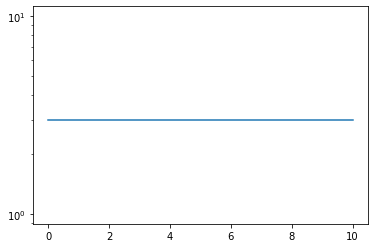

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [13]:
N = 30
iterlen = 10
norm_list = []
A = np.array([[1.,2.],[3.,5.]])
Q = np.identity(2)

norm_list.append(la.norm(np.tril(A,-1)))
for _ in range(iterlen):
    A,Q = updateAQ(A,Q)
    norm_list.append(la.norm(np.tril(A,-1)))
plt.plot(norm_list)
plt.yscale('log')
plt.show()
print(norm_list)

## <center> The eigenvalue problem </center>

Let us now combine everything. In the following code, we shall iterate the QR algorithm in the function $\texttt{solveeigen}$, including an optional argument which sets an upper bound for the norm of the lower triangular part of $\mathbf{A}^{(n)}$ and a maximum number of iterations for the QR algorithm. The function should not mutate the input matrix - use $\texttt{np.copy}$. The output should be a set of eigenvalues of $\mathbf{A}$.

If the QR algorithm does not converge, it must return None

In [14]:
def solveeigen(A,error = 1E-9, maxiter = 10000):

    N = len(A)
    An = np.copy(A)
    Qn = np.identity(N)
    
    for _ in range(maxiter):
        An,Qn = updateAQ(An,Qn)
        la.norm(np.tril(An,-1))
        
        if la.norm(np.tril(An,-1)) < error:
            eigenvalues = []
            for i in range(N):
                eigenvalues.append(An[i,i])
        
            return eigenvalues
        
    return None

In the following unit test, we generate a matrix whose eigenvalues are known via a similarity transformation. We then get the eigenvalues using $\texttt{solveeigen}$ above.

In [15]:
## generate matrix whose eigenvalues are known
N = 10
eigvals = ra.rand(N)
A = np.diag(eigvals)

## generate a similarity matrix
V = ra.rand(N,N)
Q = getQ(V)
QT = np.transpose(Q)

## similarity transformation
A = np.dot(np.dot(QT,A),Q)

## solve numerical eigenvalues
numeigvals = solveeigen(A)
assert la.norm(np.sort(numeigvals) - np.sort(eigvals)) < error

C:\Users\dj1ga\AppData\Local\Temp\ipykernel_13848\2621877471.py:5: RuntimeWarning: invalid value encountered in double_scalars
  u -= (np.dot(v,w)/np.dot(w,w))*w


AxisError: axis -1 is out of bounds for array of dimension 0

## <center> What about the eigenvectors </center>

The eigenvectors of the Schur form of $\mathbf{A}$ is easy to solve, because the matrix is of upper triangular form. This is achievable via back propagation. Then, one can use the total similarity transformation $Q^{(n)}$ to calculate the eigenvectors of $\mathbf{A}$.

This is left as an exercise to the masipag na reader.